# Charting the Path to Sustainability: Integrating Land Sector Data with SDGs
## Task 4_Visualization_Prototype
### Land Sector Dataset Category; Administrative

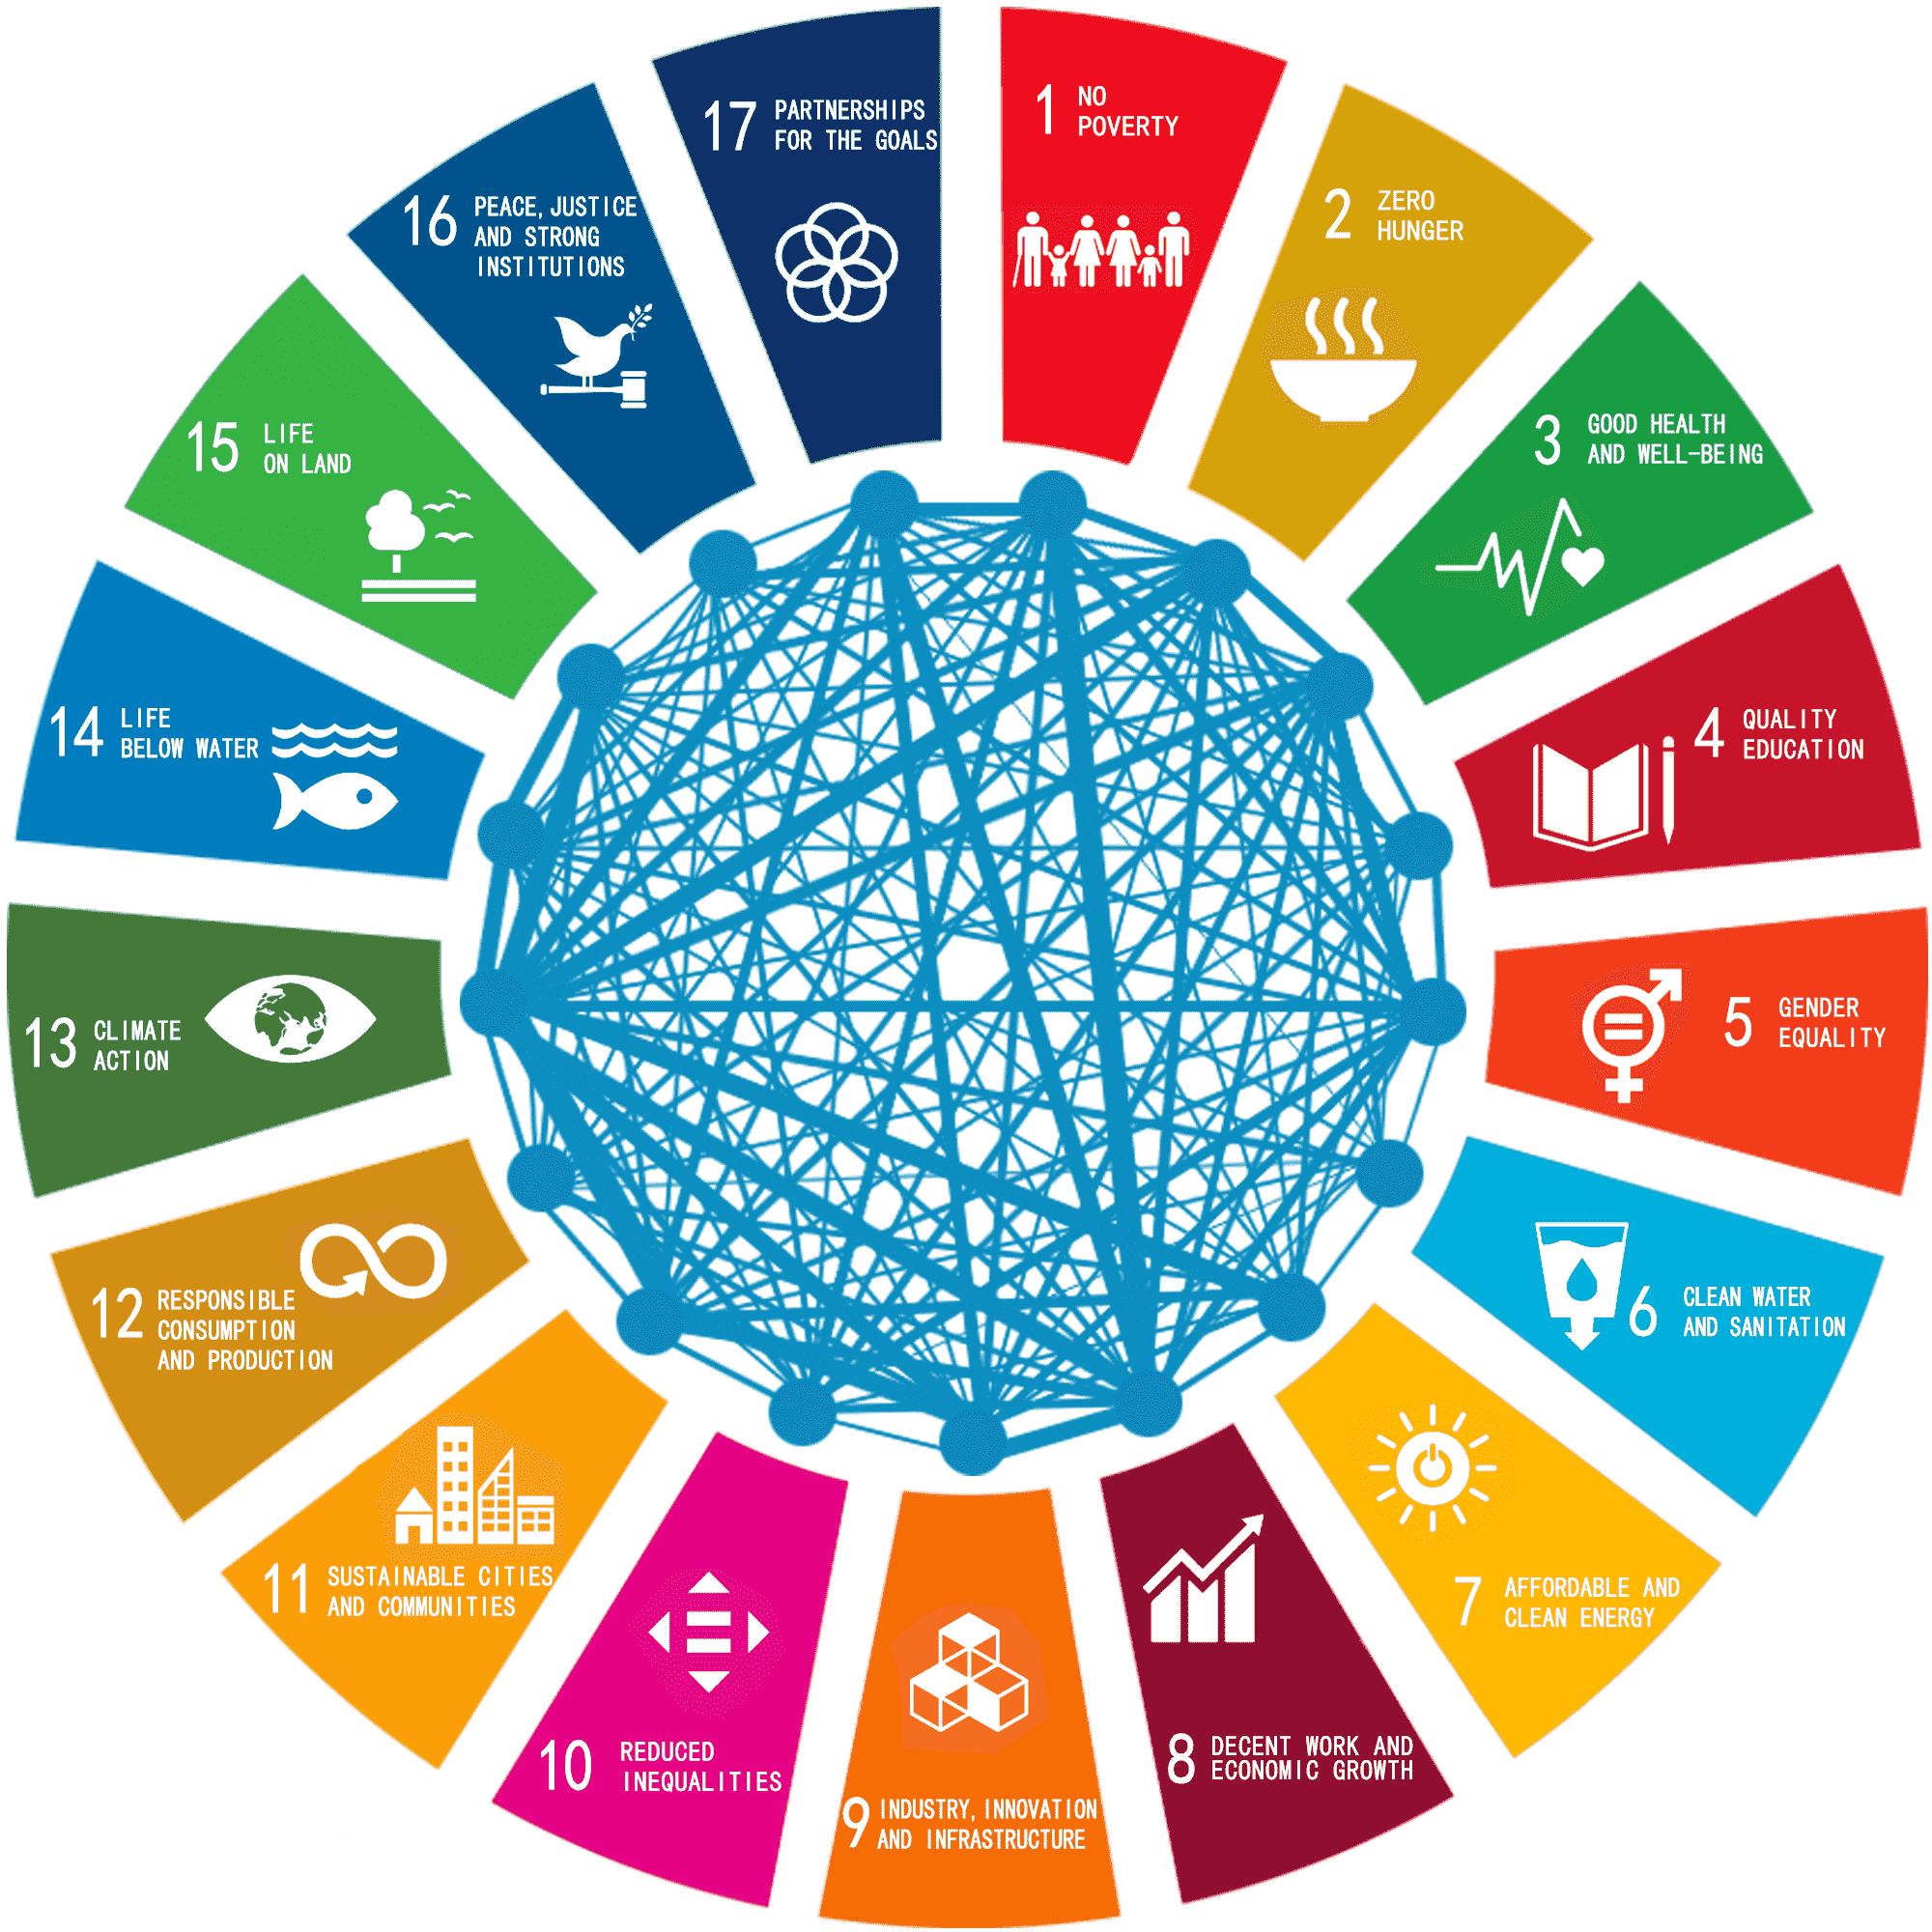

#### TABLE OF CONTENT

#### 1. INTRODUCTION
    1.0 OVERVIEW
    1.1 AIM

#### 2. REPOSITORY
    2.0 IMPORT LIBRARIES
    2.1 LOAD DATASETS

#### 3. VISUALIZATIONS PROTOTYPE
     3.O MAPPED WORLD SOIL RESOURCES BOUNDARY VISUALIZATION
     3.1 MAPPED GLOBAL ROADS VISUALIZATION
     3.2 OVERLAY VISUALIZATION
     3.3 WORLD PROTECTED AREAS VISUALIZATION

#### 4. SUMMARY

#### INTRODUCTION
    1.0 OVERVIEW

n 2015, the United Nations adopted the Sustainable Development Goals (SDGs), also known as the Global Goals. These goals represent a universal call to action aimed at eradicating poverty, safeguarding the environment, and ensuring that all individuals can experience peace and prosperity by 2030.

There are 17 interconnected SDGs that acknowledge the interplay between different areas of development. They emphasize that actions in one domain have repercussions in others and that development should harmonize social, economic, and environmental sustainability.

At an earlier stage of this project, two SDGs were associated with the administrative land sector dataset category due to their alignment with the goals' objectives. These mapped datasets will serve as the foundation for creating a prototype for data visualization in this task.

The first of these goals, Goal 11, focuses on Sustainable Cities and Communities. Its objective is to foster inclusive, safe, resilient, and sustainable urban areas and human settlements.

The second, Goal 15, centers on Life on Land, with the aim of preserving terrestrial ecosystems. It calls for the sustainable management of forests, efforts to combat desertification, the reversal of land degradation, and the prevention of biodiversity loss.

    1.1 AIM

The aim of the task is to create a prototype of a data visualization component that visually represents the mapped relationships between land attributes and Sustainable Development Goals (SDGs). 

#### REPOSITORY
    2.0 IMPORT LIBRARIES

Importing libraries is a critical step before loading the dataset. It is critical to import only the libraries that you are certain you will need to work with your dataset. To import to libraries, use the keyword import.

In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

     2.1 LOAD DATASETS

In [2]:
# Load mapped datasets from task 2

# Mapped world soil dataset
wrld_soil_bound = (r"C:\Users\User\Downloads\Mapped_WSR.geojson")

# Read the json file into geodataframe
wrld_soil_bound_gdf = gpd.read_file(wrld_soil_bound)

In [3]:
wrld_soil_bound_gdf.head(2)

,SNAME,IPCC,Mapped_SDGs,geometry
0,AB,Albeluvisol,SDG 15: Life on Land,"MULTIPOLYGON (((31.77594 49.15567, 31.98717 49..."
1,AC,Acrisol,SDG 15: Life on Land,"MULTIPOLYGON (((116.05041 -2.90441, 116.04652 ..."


In [4]:
# Check no.of rows and columns for mapped soil dataframe
wrld_soil_bound_gdf.shape

(33, 4)

The mapped world soil resources dataframe has 33 rows and 4 columns.

In [5]:
# Global roads
global_roads = (r"C:\Users\User\Downloads\Mapped_Global_Roads.geojson")

# Read the json file into geodataframe
global_roads_gdf = gpd.read_file(global_roads)

In [6]:
global_roads_gdf.head(2)

,OBJECTID,ONME,FCLASS,SRFTPE,ISSEASONAL,CURNTPRAC,GDWTHRPRAC,SUM_LENGTH_KM,Mapped_SDGs,geometry
0,1,NaN,0,0.0,0.0,NaN,NaN,16686.65607,SDG 11: Sustainable Cities and Communities,"LINESTRING (-66.82451 17.98029, -66.82455 17.9..."
1,2,NaN,0,0.0,0.0,NaN,NaN,16686.65607,SDG 11: Sustainable Cities and Communities,"LINESTRING (-66.62012 17.98131, -66.62126 17.9..."


In [7]:
# Check no.of rows and columns for mapped roads dataframe
global_roads_gdf.shape

(1101300, 10)

The mapped global roads dataframe has 1101300 rows and 10 columns. 

In [8]:
# World Protected Areas
protected_areas_gdf = gpd.read_file(r"C:\Users\User\Documents\Mapped_Protected_Areas.geojsonl")

In [9]:
protected_areas_gdf.head(2)

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,SUPP_INFO,CONS_OBJ,Mapped_SDGs,geometry
0,10715.0,10715,1,Kronotskiy,Kronotskiy,UNESCO-MAB Biosphere Reserve,UNESCO-MAB Biosphere Reserve,International,Not Applicable,Not Applicable,...,Not Reported,State Verified,840,RU-KAM,RUS,RUS,Not Applicable,Not Applicable,Not Mapped,"MULTIPOLYGON (((160.49655 55.17709, 160.47458 ..."
1,209777.0,209777_E,1,Sarali Land between Rivers / Great Volzhsko-Ka...,Great Volzhsko-Kamsky,UNESCO-MAB Biosphere Reserve,UNESCO-MAB Biosphere Reserve,International,Not Applicable,Not Applicable,...,Not Reported,State Verified,840,RU-TA,RUS,RUS,Not Applicable,Not Applicable,Not Mapped,"POLYGON ((49.30487 55.36806, 49.28598 55.35780..."


In [10]:
# Check no.of rows and columns for mapped protected areas dataframe
protected_areas_gdf.shape

(240165, 32)

The mapped protected areas dataframe has 240165 rows and 32 columns. 

#### VISUALIZATIONS

    3.O MAPPED WORLD SOIL RESOURCES BOUNDARY VISUALIZATION

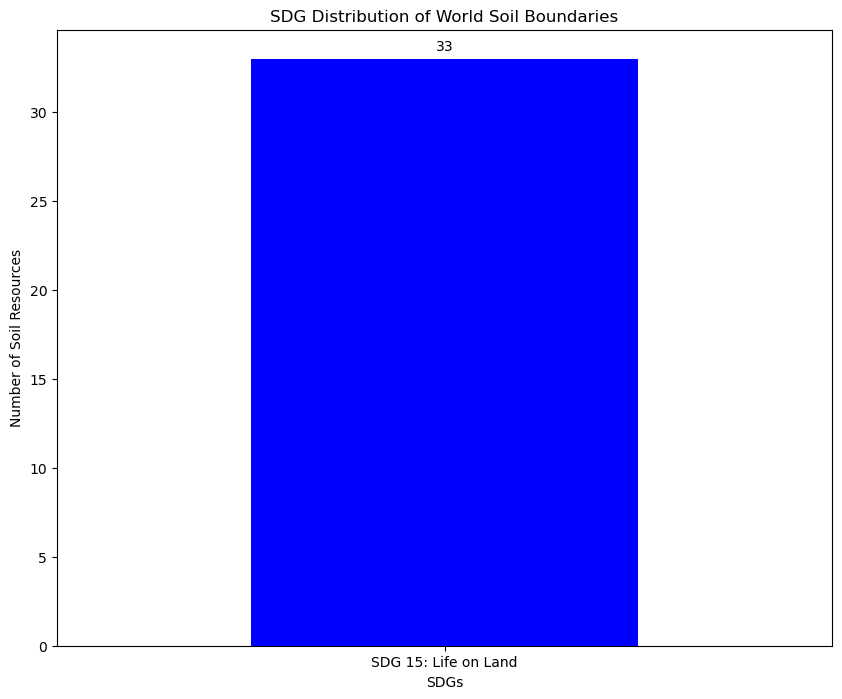

In [11]:
# Create bar chart for mapped world soil boundaries
sdg_counts_soil = wrld_soil_bound_gdf["Mapped_SDGs"].value_counts()
plt.figure(figsize=(10, 8))

# Create the bar chart
ax = sdg_counts_soil.plot(kind="bar", color="blue")
plt.title("SDG Distribution of World Soil Boundaries")
plt.xlabel("SDGs")
plt.ylabel('Number of Soil Resources')
plt.xticks(rotation=0)

# Add counts on top of the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() +0.5, str(i.get_height()), ha='center')

    
# Display the plot
plt.show()


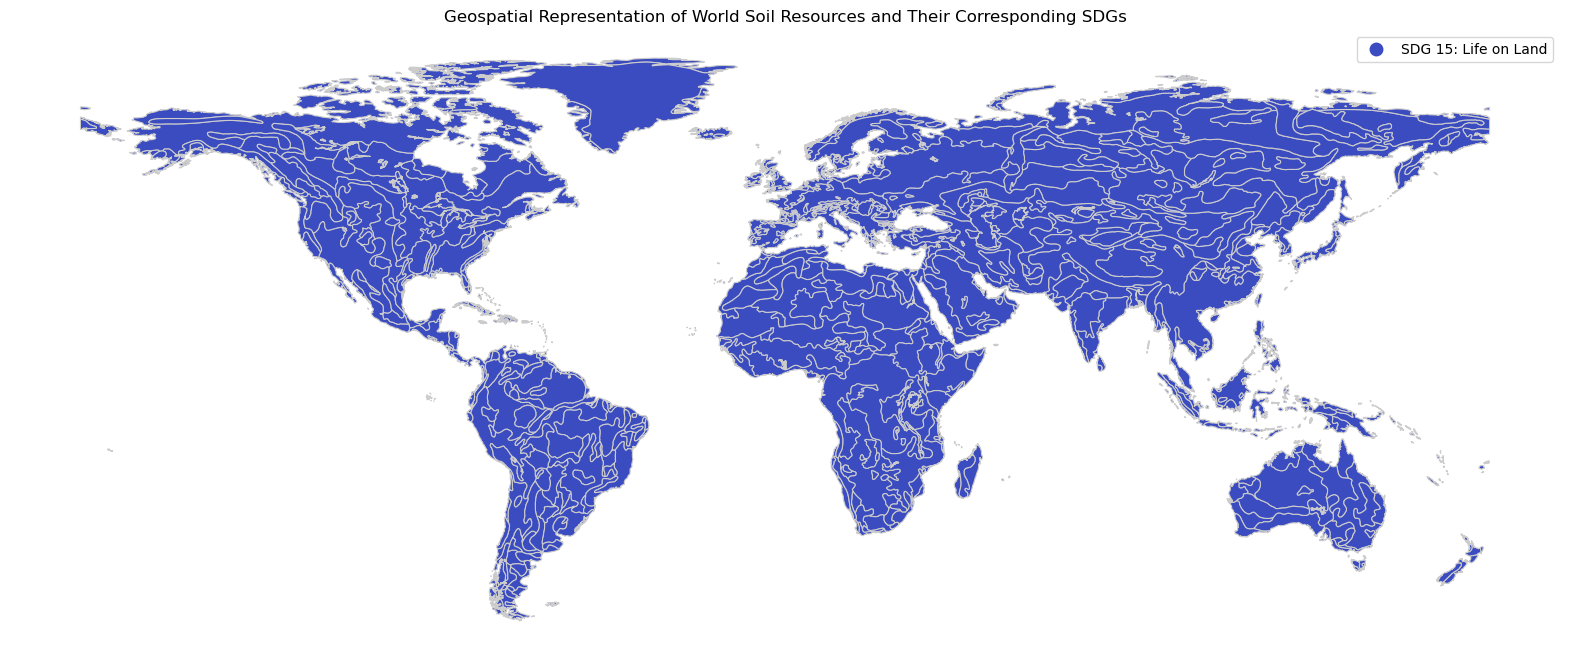

In [12]:
# Create a choropleth map
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

wrld_soil_bound_gdf.plot(column="Mapped_SDGs", cmap="coolwarm", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

# Add a title
ax.set_title("Geospatial Representation of World Soil Resources and Their Corresponding SDGs")

# Display the map
plt.axis("off")
plt.show()


In [13]:
# Create pivot table for heatmap 

# Create pivottable
pivot_table = pd.pivot_table(wrld_soil_bound_gdf, values="IPCC", index="Mapped_SDGs", aggfunc="count")

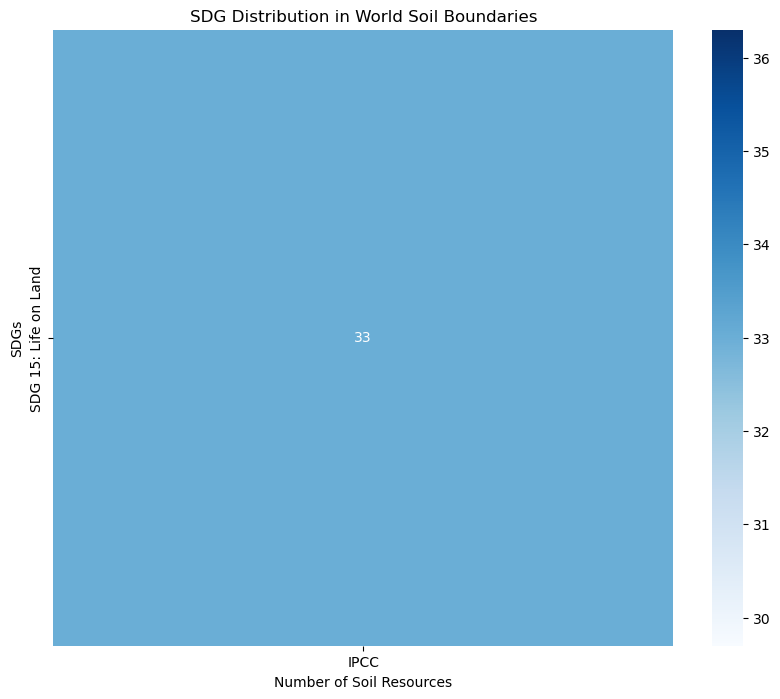

In [14]:
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap="Blues", fmt="d")

# Add title
plt.title("SDG Distribution in World Soil Boundaries")
plt.xlabel("Number of Soil Resources")
plt.ylabel("SDGs")

# Display map
plt.show()

**Observation**

All visual representations show that all soil resources (type) have been mapped to SDG 15: Life on Land because of their alignment with the goal's targets.

    3.1 MAPPED GLOBAL ROADS VISUALIZATION

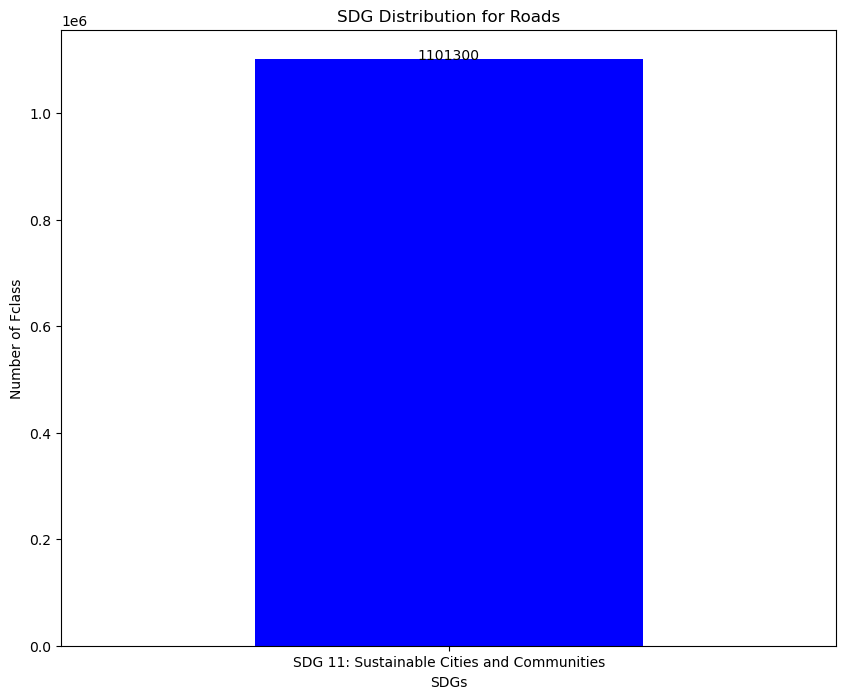

In [15]:
# Create bar chart for global roads
sdg_counts_roads = global_roads_gdf["Mapped_SDGs"].value_counts()
plt.figure(figsize=(10, 8))

# Create the bar chart
ax = sdg_counts_roads.plot(kind="bar", color="blue")
plt.title("SDG Distribution for Roads")
plt.xlabel("SDGs")
plt.ylabel("Number of Fclass")
plt.xticks(rotation=0)

# Add counts on top of the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, str(i.get_height()), ha='center')

# Display the plot
plt.show()


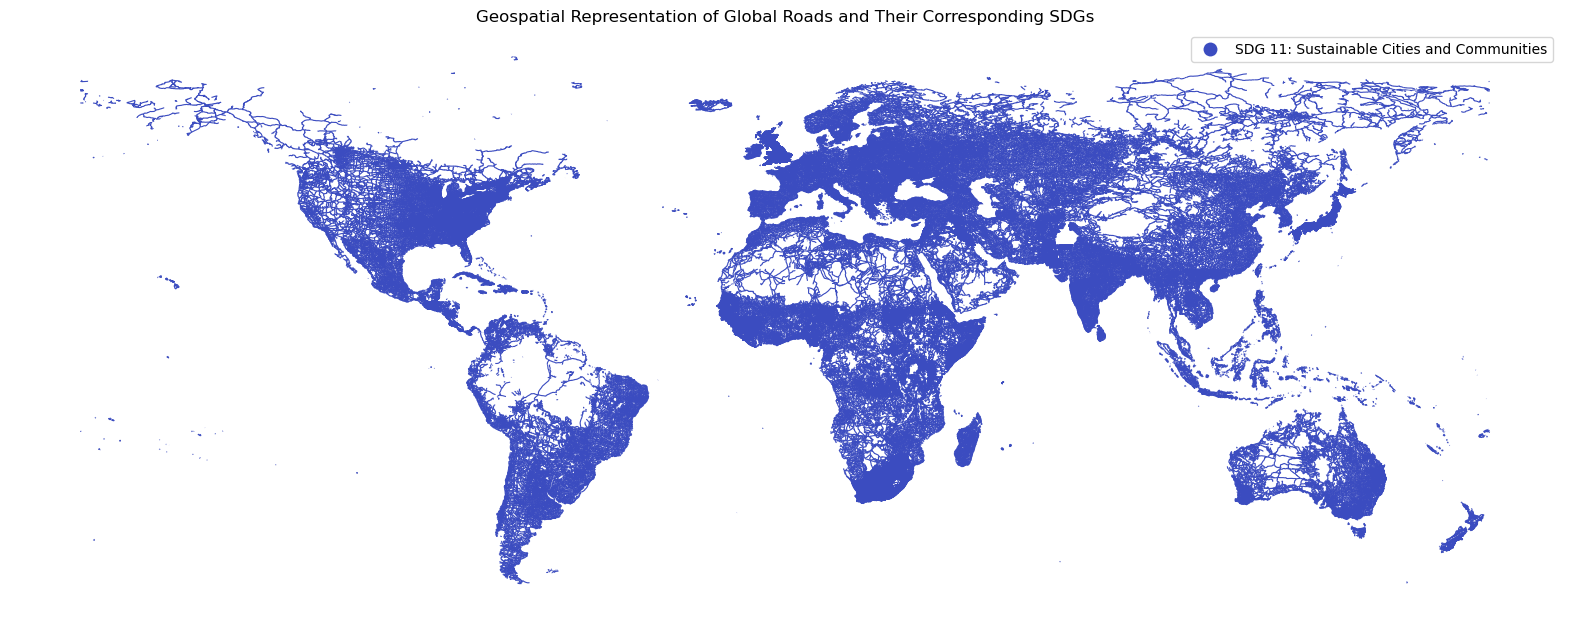

In [16]:
# Create a choropleth map
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

global_roads_gdf.plot(column="Mapped_SDGs", cmap="coolwarm", linewidth=0.8, ax=ax, legend=True)

# Add title
ax.set_title("Geospatial Representation of Global Roads and Their Corresponding SDGs")

# Display the map
plt.axis("off")
plt.show()


In [17]:
# Create pivot table for heatmap 

# Create pivot table
pivot_table_roads = pd.pivot_table(global_roads_gdf, values="FCLASS", index="Mapped_SDGs", aggfunc="count")

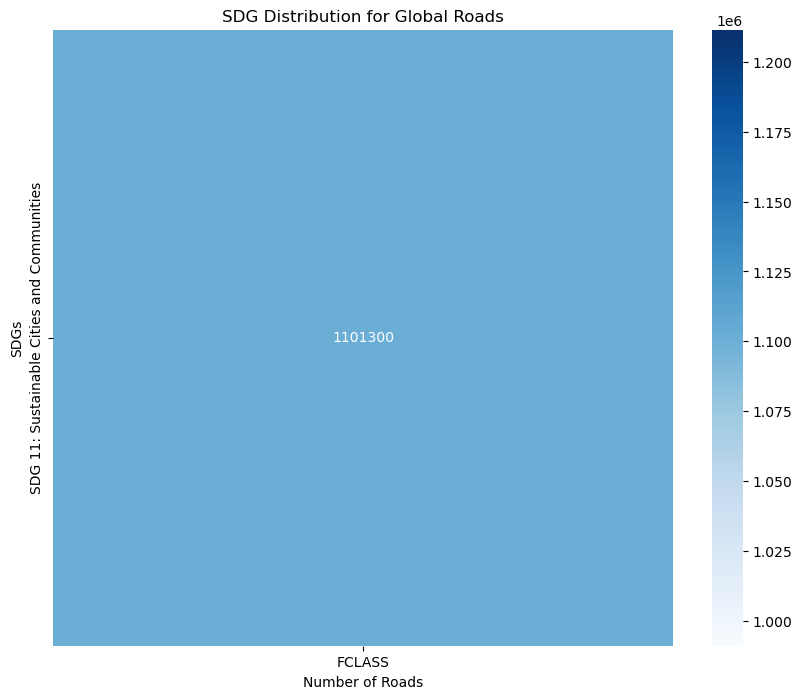

In [18]:
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table_roads, annot=True, cmap="Blues", fmt="d")

# Add title
plt.title("SDG Distribution for Global Roads")
plt.xlabel("Number of Roads")
plt.ylabel("SDGs")

# Display map
plt.show()

**Observation**

From the visual representations above, it is evident that road types, categorized according to their functional class, have been associated with SDG 11: Sustainable Cities & Communities. This alignment is attributed to their relevance to the targets outlined in this particular SDG.

    3.2 OVERLAY VISUALIZATION

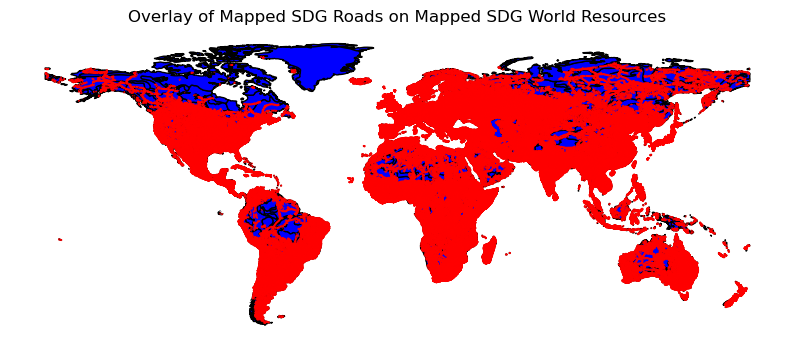

In [19]:
# Overlay the two GeoDataFrames
overlay_gdf = gpd.overlay(global_roads_gdf, wrld_soil_bound_gdf, how="intersection")

# Plot the overlay
fig, ax = plt.subplots(figsize=(10, 10))
overlay_gdf.plot(ax=ax, color="red", edgecolor="black")
wrld_soil_bound_gdf.plot(ax=ax, color="blue", edgecolor="black")

# Add title
plt.title("Overlay of Mapped SDG Roads on Mapped SDG World Resources")

plt.axis("off")
plt.show()

**Observation**

The red areas on the map represent the intersection of the Mapped SDG Roads and Mapped SDG World Resources. These are the regions where the two datasets overlap spatially.

    3.3 WORLD PROTECTED AREAS VISUALIZATION

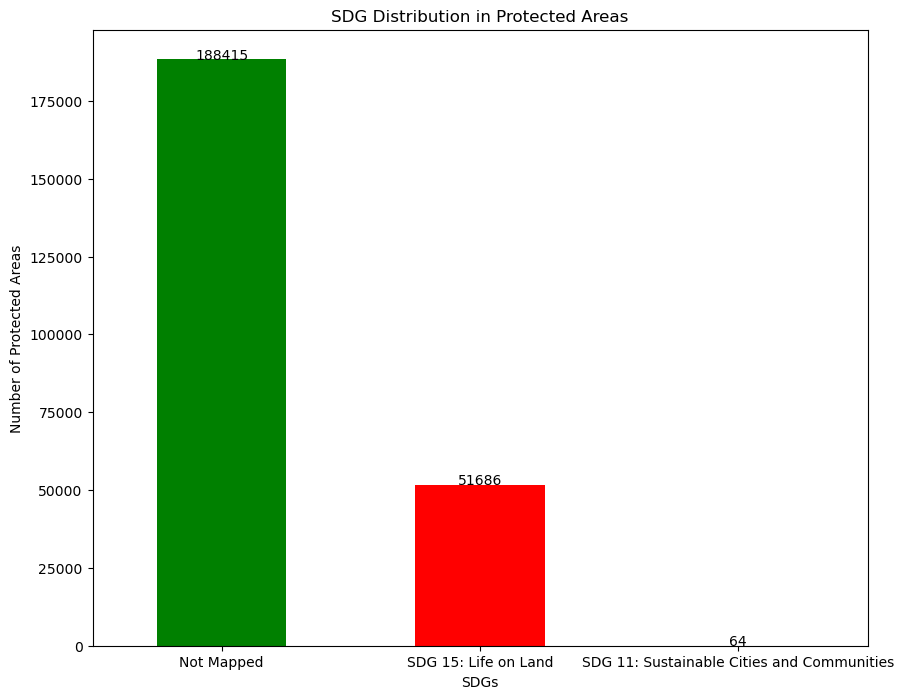

In [20]:
# Create bar chart for protected areas
sdg_counts_areas = protected_areas_gdf["Mapped_SDGs"].value_counts()
plt.figure(figsize=(10, 8))

# Create the bar chart
ax = sdg_counts_areas.plot(kind="bar", color=["green", "red", "yellow"])
plt.title("SDG Distribution in Protected Areas")
plt.xlabel("SDGs")
plt.ylabel('Number of Protected Areas')
plt.xticks(rotation=0)

# Add counts on top of the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() +0.5, str(i.get_height()), ha='center')

# Display the plot
plt.show()

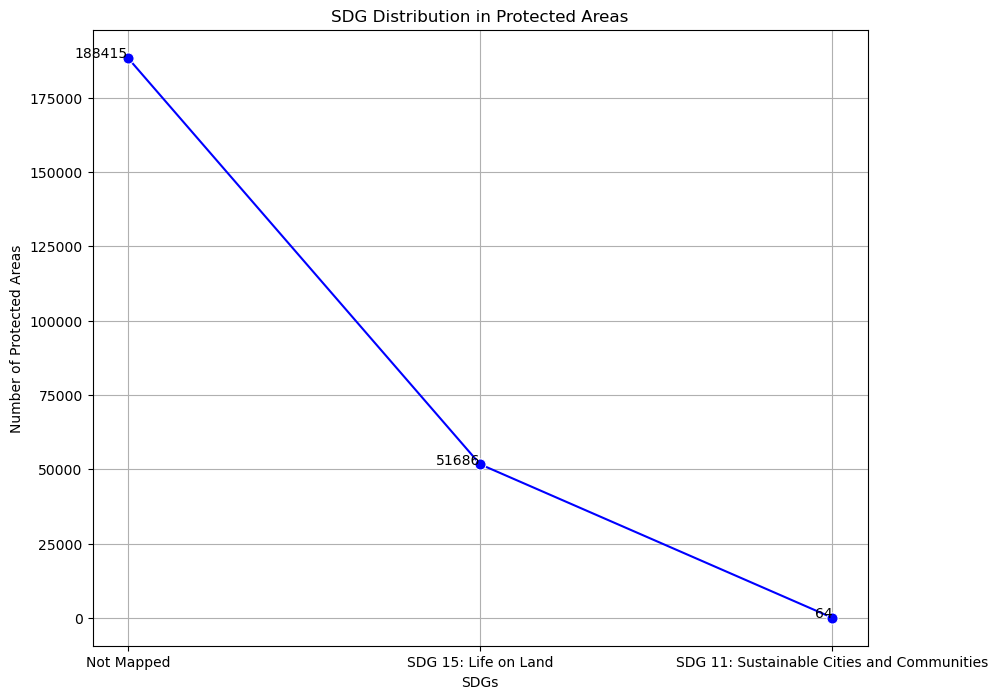

In [21]:
# Create line chart for protected areas
sdg_counts_areas = protected_areas_gdf["Mapped_SDGs"].value_counts().reset_index()
sdg_counts_areas.columns = ["SDGs", "Number of Protected Areas"]

plt.figure(figsize=(10, 8))

# Create the line chart using seaborn
ax = sns.lineplot(data=sdg_counts_areas, x="SDGs", y="Number of Protected Areas", marker="o", markersize=8, color="blue")
plt.title("SDG Distribution in Protected Areas")
plt.xlabel("SDGs")
plt.ylabel('Number of Protected Areas')
plt.xticks(rotation=0)

# Add data points on the line
for index, row in sdg_counts_areas.iterrows():
    ax.text(index, row["Number of Protected Areas"], str(row["Number of Protected Areas"]), ha='right')

# Display the plot
plt.grid(True)
plt.show()

In [22]:
# Create pivot table for heatmap 

# Create pivot table
pivot_table_wdpa = pd.pivot_table(protected_areas_gdf, values="DESIG_ENG", index="Mapped_SDGs", aggfunc="count")

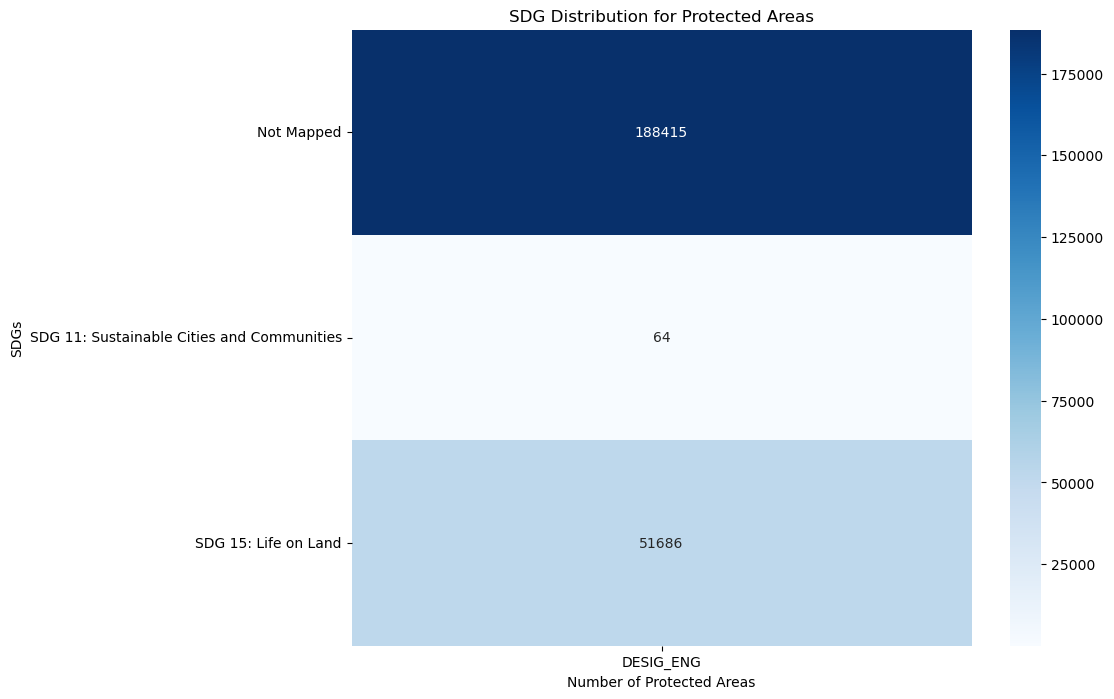

In [23]:
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table_wdpa, annot=True, cmap="Blues", fmt="d")

# Add title
plt.title("SDG Distribution for Protected Areas")
plt.xlabel("Number of Protected Areas")
plt.ylabel("SDGs")

# Display map
plt.show()

**Observation**

The visual representations reveal that a substantial number of entries (188,415) remained unassigned to particular SDGs. These entries likely belong to categories such as "unspecified" or "contested," a classification based on recorded information found in the "Ownership Structure" column within the "Protected Areas" dataset.

Additionally, the visuals illustrate that only a minor fraction of the entries (64) were linked to SDG 11: Sustainable Cities and Communities. Conversely, the predominant portion of the mapped entries (51,686) was affiliated with SDG 15: Life on Land.

#### SUMMARY & KEY FINDINGS

The clear mapping of soil resources to SDG 15 underscores the significance of these resources in achieving the SDG's objectives, particularly related to terrestrial ecosystem conservation.

The alignment of road types with SDG 11 emphasizes the role of infrastructure in creating sustainable and resilient urban environments.

Spatial intersections pinpoint areas where mapped SDG Roads coincide with world resources, providing opportunities for in-depth analysis of resource accessibility and infrastructure development.

The presence of 188,415 unassigned entries in the "Protected Areas" dataset underscores the need for further data categorization, likely driven by issues such as "unspecified" or "contested" classifications.

The majority of mapped entries (51,686) aligned with SDG 15, highlighting a strong focus on the conservation and sustainable management of terrestrial ecosystems within the "Protected Areas" dataset.